# Multiclass text classification for topic identification using LSTM:-

# Part 1:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('dataset.xlsx')
df = df[['text', 'class']]
df.head()

,text,class
0,bathroom was very badly,bathroom
1,bathroom is not very practical,bathroom
2,access toilet,bathroom
3,bath would nice,bathroom
4,bath shower,bathroom


## Check for the number of labels we have to predict

In [3]:
print('number of classes:\n',df['class'].nunique())
print()
print('classes:\n',df['class'].unique())

number of classes:
 16

classes:
 ['bathroom' 'cleanliness' 'elevator' 'facilities & surroundings'
 'fnb & bar' 'fnb & food' 'fnb & restaurant' 'internet' 'location' 'noise'
 'parking' 'room' 'staff' 'unclassified' 'value for money' 'z']


## Frequency of occurence of each label

(array([4949.,  168., 1267.,  242.,  391., 2020.,  894.,  537., 2124.,
        1037.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

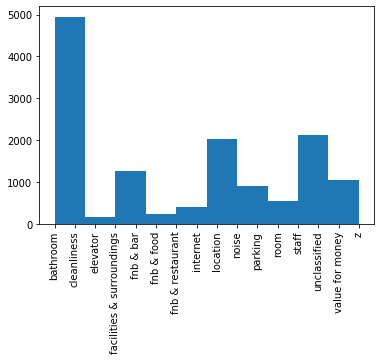

In [4]:
plt.xticks(rotation='vertical')
plt.hist(df['class'])

# Part 2:

In [5]:
import re

# If you don't have the stopwords list installed, uncomment and run the below two lines
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk import word_tokenize

## Text preprocessing:

In [6]:
# all the symbols we got to get rid of are given below
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

# function to clean 'text' column from dataset
def clean_text(text):
    # convert the text to lower case to maintain uniformity
    text = text.lower()
    # replace all the occurence of bad symbols by space or no space
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    # get rid of stopwords (important)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    # return clean text
    return text


df['text'] = df['text'].apply(clean_text) #apply the above function

# Part 3:

## Building the LSTM Model

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
# Limit the data set to the top 5,0000 words.
# Set the max number of words in each complaint at 250



MAX_NB_WORDS = 50000 # The maximum number of words to be used. (most frequent)

MAX_SEQUENCE_LENGTH = 250 # Max number of words in each cell of 'text' column.

EMBEDDING_DIM = 100 

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

tokenizer.fit_on_texts(df['text'].values)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 7465 unique tokens.


## Truncate and pad the input sequences so that they are all in the same length for modeling

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13629, 250)


## Converting categorical labels to numbers

In [9]:
Y = pd.get_dummies(df['class']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (13629, 16)


# Part 4:

## Basic Imports

In [10]:
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

import random

## Train test split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 42)

print("shape of train set", X_train.shape, Y_train.shape)
print("shape of test set", X_test.shape, Y_test.shape)

shape of train set (8177, 250) (8177, 16)
shape of test set (5452, 250) (5452, 16)


## Some basic parameters for out model

In [12]:
# don't change this
inp_length = X.shape[1]
out_layer = 16

# epochs can be changed
eps = random.randint(10,20)
print(f'number of epochs:\t{eps}')

number of epochs:	15


## Sequential model for multiclass text classification using LSTM

feel free to tweak the hyperparameters (dropouts, number of neurons in LSTM layer, optimizer,...)

In [13]:
model = Sequential()

model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = inp_length))

model.add(SpatialDropout1D(0.5))

model.add(LSTM(20, dropout = 0.5, recurrent_dropout = 0.5))

model.add(Dense(random.randint(50,200), activation='relu'))
model.add(Dense(random.randint(50,200), activation='relu'))
model.add(Dense(random.randint(50,200), activation='relu'))
model.add(Dense(random.randint(50,200), activation='relu'))
model.add(Dense(random.randint(50,200), activation='relu'))

model.add(Dense(out_layer, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(
    X_train, 
    Y_train, 
    epochs = eps, 
    validation_split = 0.2
)

Train on 6541 samples, validate on 1636 samples
Epoch 1/15
6541/6541 [==============================] - 28s 4ms/sample - loss: 2.0011 - accuracy: 0.3475 - val_loss: 1.5066 - val_accuracy: 0.4627
Epoch 2/15
6541/6541 [==============================] - 26s 4ms/sample - loss: 1.2527 - accuracy: 0.5903 - val_loss: 0.9128 - val_accuracy: 0.6999
Epoch 3/15
6541/6541 [==============================] - 26s 4ms/sample - loss: 0.9121 - accuracy: 0.6967 - val_loss: 0.7395 - val_accuracy: 0.7647
Epoch 4/15
6541/6541 [==============================] - 25s 4ms/sample - loss: 0.7773 - accuracy: 0.7320 - val_loss: 0.7222 - val_accuracy: 0.7940
Epoch 5/15
6541/6541 [==============================] - 26s 4ms/sample - loss: 0.6525 - accuracy: 0.7831 - val_loss: 0.6198 - val_accuracy: 0.8123
Epoch 6/15
6541/6541 [==============================] - 26s 4ms/sample - loss: 0.5564 - accuracy: 0.8126 - val_loss: 0.5758 - val_accuracy: 0.8276
Epoch 7/15
6541/6541 [==============================] - 27s 4ms/sample

In [15]:
accr = model.evaluate(X_test,Y_test,verbose=0) # verbose kept 0 to avoid way too big progress bar
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.457
  Accuracy: 0.883


# Part 5:

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

## Plotting accuracy-loss curve

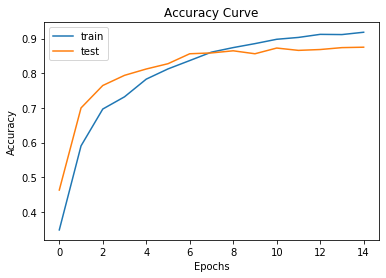

In [17]:
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(len(acc)),acc, label='train')
plt.plot(range(len(val_acc)),val_acc, label='test')
plt.legend()
plt.show()

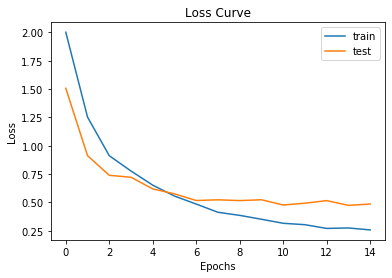

In [18]:
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(len(loss)),loss, label='train')
plt.plot(range(len(val_loss)),val_loss, label='test')
plt.legend()
plt.show()

## Test with unseen review

In [19]:
sample_review_input='Excellent location, excellent cleanliness' 

In [20]:
new_complaint = [
    sample_review_input
]

seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)

labels = [
    'bathroom', 
    'cleanliness', 
    'elevator', 
    'facilities & surroundings',
    'fnb & bar', 
    'fnb & food', 
    'fnb & restaurant', 
    'internet', 
    'location', 
    'noise',
    'parking', 
    'room', 
    'staff', 
    'unclassified', 
    'value for money', 
    'z'
]

print(f'predicted label:\t{labels[np.argmax(pred)]}\n\n')

predicted label:	cleanliness




In [21]:
print("probability of the complaint belonging to each of the labels:\n")
for i in range(len(pred[0])):
    print(labels[i],":\t",pred[0][i])

probability of the complaint belonging to each of the labels:

bathroom :	 7.1742026e-05
cleanliness :	 0.99914765
elevator :	 0.00011814878
facilities & surroundings :	 0.0001942001
fnb & bar :	 3.7753992e-08
fnb & food :	 1.7160219e-05
fnb & restaurant :	 4.2617074e-09
internet :	 4.508555e-09
location :	 2.2273805e-05
noise :	 8.699738e-09
parking :	 1.236757e-06
room :	 0.00019557883
staff :	 0.00012632096
unclassified :	 8.093812e-07
value for money :	 8.238935e-08
z :	 0.00010487135
